# Run Test (Gaussian Excitation)

## Introduction

This is a sample run to practice generating and visualizing data.  This sample was adapted from the gauss_qsym_pml example.  Unlike the gauss_qsym_pml example, it does not commpare pml data to nonreflect data.  The run.py script includes the bc.apply_pml command, generating PML data.

## Methods

All of these models can be found in ```test/gauss[_pml]```, using the commands in ```run.sh```.  
The data was visualized using the same code from gauss_qsym_pml.  The PML data was used for both the nonreflect and pml inputs - the difference data is null because the data for both inputs is identical.

In [12]:
# load in the data
nonreflect = sio.loadmat('res_sim.mat')
pml = sio.loadmat('res_sim.mat')

def make_images(nonreflect, pml, ts):
    """
    generate displacement images of each BC at a specified time step, along with the difference
    """
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(131)
    nr = ax.imshow(nonreflect['arfidata'][:,:,ts], \
                   extent = [nonreflect['lat'].min(), nonreflect['lat'].max(), nonreflect['axial'].max(), nonreflect['axial'].min()])
    ax.set_ylabel('Depth (mm)', fontsize=14, fontweight='bold')
    ax.set_title('Non-reflecting BC', fontsize=14, fontweight='bold')
    cbar = fig.colorbar(nr, shrink=0.5)
    
    ax = fig.add_subplot(132)
    p = ax.imshow(pml['arfidata'][:,:,ts], \
                  extent = [pml['lat'].min(), pml['lat'].max(), pml['axial'].max(), pml['axial'].min()])
    ax.set_xlabel('Lateral (mm)', fontsize=14, fontweight='bold')
    ax.set_title('PML BC', fontsize=14, fontweight='bold')
    cbar = fig.colorbar(p, shrink=0.5, pad=0.1)

    pml_nr_diff = pml['arfidata'][:,:,ts] - nonreflect['arfidata'][:,:,ts]
    ax = fig.add_subplot(133)
    d = ax.imshow(pml_nr_diff, \
                  extent = [nonreflect['lat'].min(), nonreflect['lat'].max(), nonreflect['axial'].max(), nonreflect['axial'].min()], \
                  vmin=-5, vmax=5,
                  cmap='seismic')
    ax.set_title('Difference', fontsize=14, fontweight='bold')
    cbar = fig.colorbar(d, ax=ax, shrink=0.5)
    cbar.set_label('Displacement (um)', fontsize=14, fontweight='bold')

## Results

### Time Step 5

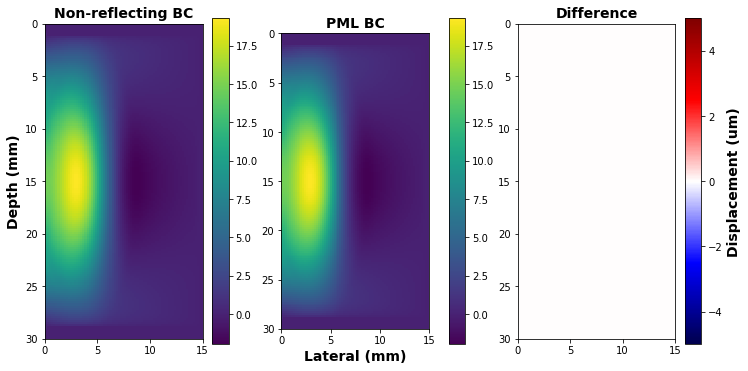

In [8]:
make_images(nonreflect, pml, 5)

### Time Step 10

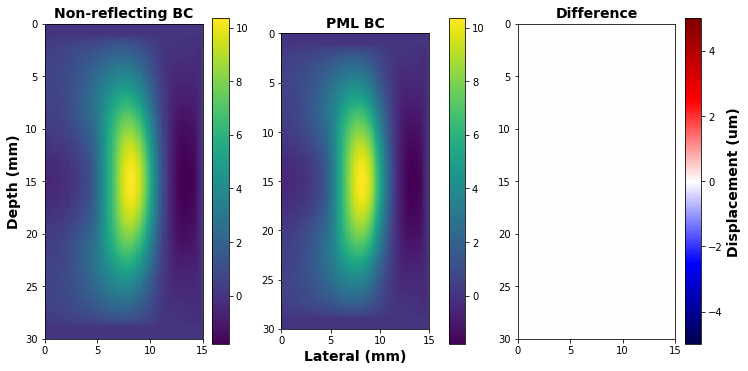

In [9]:
make_images(nonreflect, pml, 10)

### Time Step 15

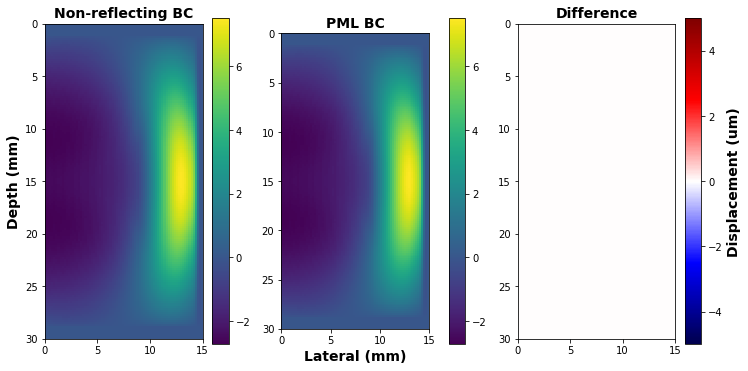

In [10]:
make_images(nonreflect, pml, 15)

### Time Step 19

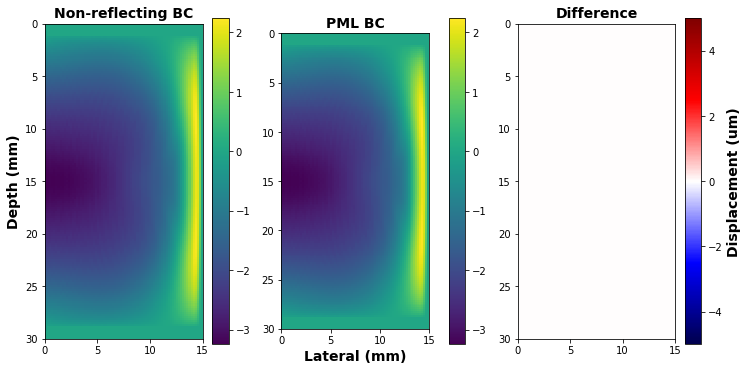

In [11]:
make_images(nonreflect, pml, 19)

## Conclusions

* This was a way to learn how to run the FEM simulation